In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
%matplotlib inline

# Load the data
# Replace 'childcare_costs.csv' with your actual CSV file path
df = pd.read_excel('nationaldatabaseofchildcareprices.xlsx', sheet_name='nationaldatabaseofchildcare')
df.head()



,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


In [7]:
# Ensure proper types
df['StudyYear'] = df['StudyYear'].astype(int)
df['UNR_16'] = pd.to_numeric(df['UNR_16'], errors='coerce')



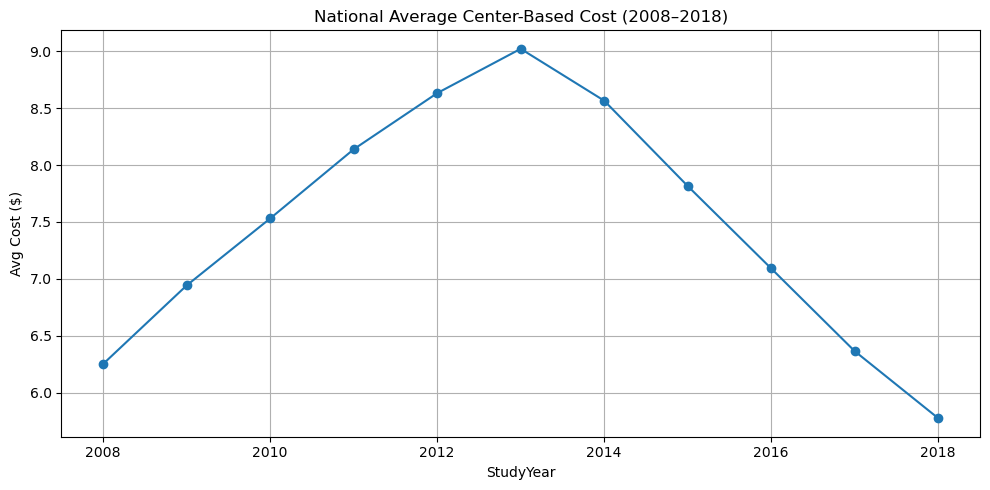

In [8]:
# --- 1. National Trend Line Plot (2008–2018) ---
ts = df.groupby('StudyYear')['UNR_16'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(ts['StudyYear'], ts['UNR_16'], marker='o')
plt.title('National Average Center-Based Cost (2008–2018)')
plt.xlabel('StudyYear')
plt.ylabel('Avg Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()



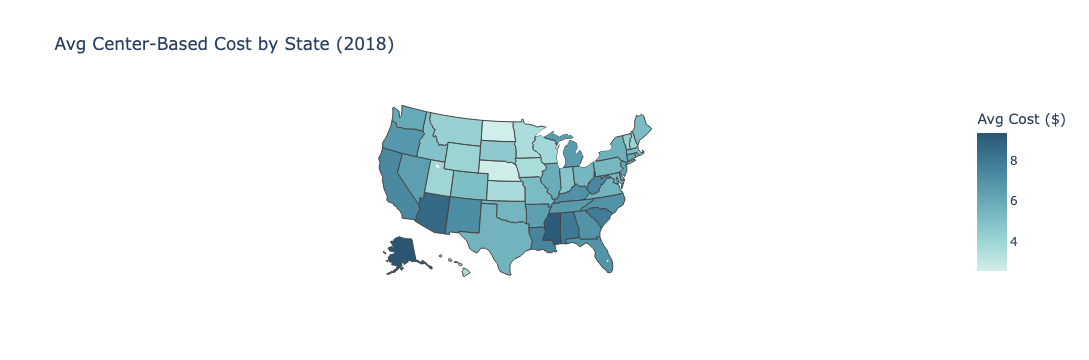

In [9]:
#%pip install notebook --upgrade
# --- 2. Choropleth Map for 2018 ---
df2018 = df[df['StudyYear'] == 2018].groupby(['State_Abbreviation'])['UNR_16'].mean().reset_index()
fig = px.choropleth(
    df2018,
    locations='State_Abbreviation',
    locationmode='USA-states',
    color='UNR_16',
    scope='usa',
    color_continuous_scale='Teal',
    labels={'UNR_16': 'Avg Cost ($)'},
    title='Avg Center-Based Cost by State (2018)'
)
fig.show()




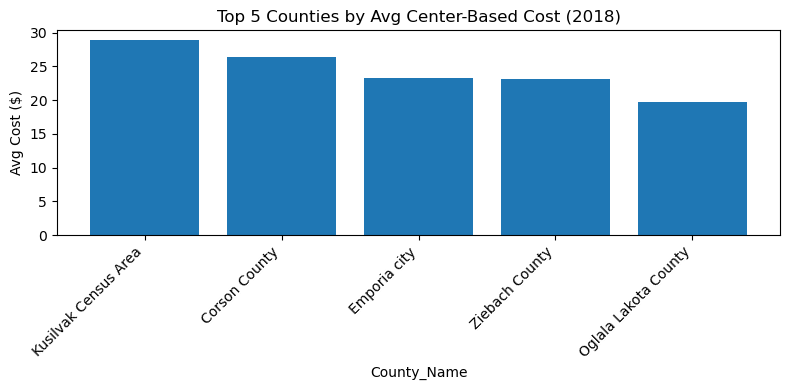

In [10]:

# --- 3. Top 5 Counties by UNR_16 in 2018 ---
top_counties = (
    df[df['StudyYear'] == 2018]
    .groupby('County_Name')['UNR_16']
    .mean()
    .nlargest(5)
    .reset_index()
)
plt.figure(figsize=(8, 4))
plt.bar(top_counties['County_Name'], top_counties['UNR_16'])
plt.title('Top 5 Counties by Avg Center-Based Cost (2018)')
plt.xlabel('County_Name')
plt.ylabel('Avg Cost ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



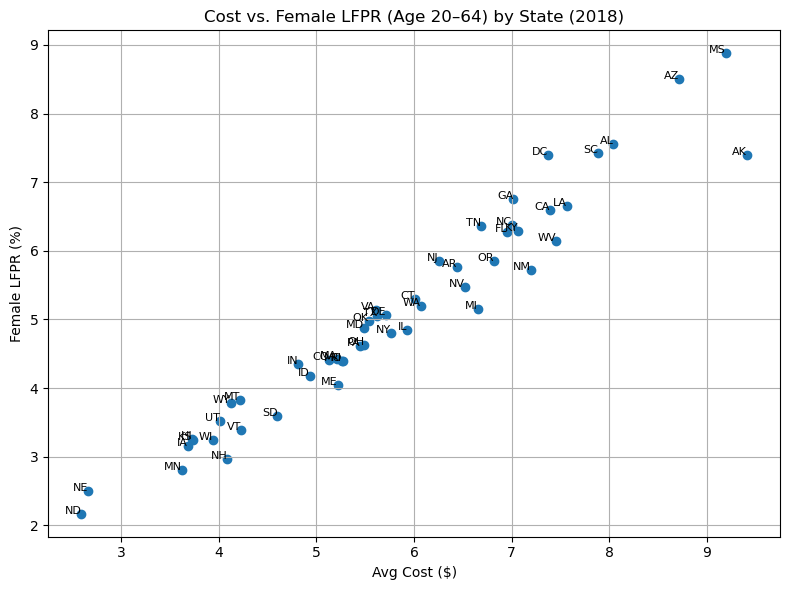

In [11]:
# --- 4. Cost vs. Female Labor Force Participation Scatterplot (2018) ---
scatter_df = (
    df[df['StudyYear'] == 2018]
    .groupby('State_Abbreviation')
    .agg({'UNR_16': 'mean', 'FUNR_20to64': 'mean'})
    .reset_index()
)
plt.figure(figsize=(8, 6))
plt.scatter(scatter_df['UNR_16'], scatter_df['FUNR_20to64'])
plt.title('Cost vs. Female LFPR (Age 20–64) by State (2018)')
plt.xlabel('Avg Cost ($)')
plt.ylabel('Female LFPR (%)')
for i, row in scatter_df.iterrows():
    plt.text(row['UNR_16'], row['FUNR_20to64'], row['State_Abbreviation'],
             fontsize=8, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

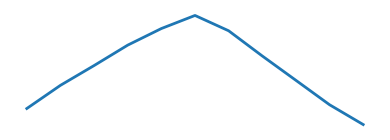

In [12]:
# --- 5. Sparkline for Infographic (2008–2018) ---
plt.figure(figsize=(4, 1.5))
plt.plot(ts['StudyYear'], ts['UNR_16'], linewidth=2)
plt.axis('off')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import requests

# Load your Excel sheet
df = pd.read_excel(
    'nationaldatabaseofchildcareprices.xlsx',
    sheet_name='nationaldatabaseofchildcare'
)

# Fetch the GeoJSON definitions directly from GitHub
state_geo = requests.get(
    'https://raw.githubusercontent.com/taylorduncan/DSC640/main/state_heatmap.json'
).json()
county_geo = requests.get(
    'https://raw.githubusercontent.com/taylorduncan/DSC640/main/county_heatmap.json'
).json()

# Quick check
print(df.head())
print("States geo keys:", list(state_geo.keys()))
print("Counties geo keys:", list(county_geo.keys()))

  State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear   
0    Alabama                 AL  Autauga County              1001       2008  \
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler   
0    5.42     4.41     6.32         4.6          3.5  ...        83.45  \
1    5.93     5.72     6.11         4.8          4.6  ...        87.39   
2    6.21     5.57     6.78         5.1          4.6  ...        91.33   
3    7.55     8.13     7.03         6.2          6.3  ...        95.28   
4    8.60     8.88     8.29         6.7          6.4  ...        99.22   

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant   
0 

In [2]:
import plotly.express as px

# Latest year slice
latest = df[df.StudyYear == df.StudyYear.max()]

# ── State UNR_16 heat map
fig_state = px.choropleth(
    latest,
    geojson=state_geo,
    locations="State_Abbreviation",
    featureidkey="properties.id",    # your geojson uses `id` for the two-letter code
    color="UNR_16",
    scope="usa",
    title=f"State UNR_16 Heat Map ({int(latest.StudyYear.iloc[0])})"
)
fig_state.update_geos(fitbounds="locations", visible=False)
fig_state.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig_state.write_image("state_heatmap.png", width=800, height=450)

# ── County UNR_16 heat map
fig_county = px.choropleth(
    latest,
    geojson=county_geo,
    locations="County_FIPS_Code",
    featureidkey="properties.id",    # your geojson uses `id` for FIPS
    color="UNR_16",
    hover_data=["State_Name","County_Name","UNR_16"],
    scope="usa",
    title="County UNR_16 Cost Heat Map"
)
fig_county.update_geos(fitbounds="locations", visible=False)
fig_county.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig_county.write_image("county_heatmap.png", width=800, height=450)

# Confirm
!ls -lh state_heatmap.png county_heatmap.png


-rw-r--r--@ 1 Alexandria  staff    23K Jul 12 21:48 county_heatmap.png
-rw-r--r--@ 1 Alexandria  staff    23K Jul 12 21:48 state_heatmap.png


In [4]:
#%pip install --quiet "jinja2<3.1" dash jupyter-dash

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.5.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Interactive Dashboard (Dash)
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Childcare Cost & Participation Explorer"),
    html.Div([
        html.Label("Year"),
        dcc.Slider(
            id="year-slider",
            min=int(df.StudyYear.min()),
            max=int(df.StudyYear.max()),
            value=int(df.StudyYear.min()),
            marks={int(y):str(int(y)) for y in df.StudyYear.unique()},
            step=None
        )
    ], style={"width":"80%","padding":"20px"}),
    html.Div([
        html.Div([
            html.Label("State"),
            dcc.Dropdown(
                id="state-filter",
                options=[{"label": s, "value": s} for s in sorted(df.State_Name.unique())],
                multi=True,
                placeholder="All states"
            ),
            html.Br(),
            html.Label("County"),
            dcc.Dropdown(id="county-filter", placeholder="Select county")
        ], style={"width":"25%","display":"inline-block","verticalAlign":"top"}),
        html.Div(dcc.Graph(id="choropleth-map"),
                 style={"width":"70%","display":"inline-block"})
    ]),
    html.Br(),
    dcc.Graph(id="timeseries-plot")
])

@app.callback(
    Output("county-filter","options"),
    Input("state-filter","value")
)
def set_counties(selected_states):
    dff = df[df.State_Name.isin(selected_states)] if selected_states else df
    return [{"label": c, "value": c} for c in sorted(dff.County_Name.unique())]

@app.callback(
    Output("choropleth-map","figure"),
    Input("year-slider","value"),
    Input("state-filter","value"),
    Input("county-filter","value")
)
def update_map(year, states, county):
    dff = df[df.StudyYear==year]
    if states: dff = dff[dff.State_Name.isin(states)]
    if county: dff = dff[dff.County_Name==county]
    fig = px.choropleth(
        dff,
        geojson=state_geo,
        locations="State_Abbreviation",
        featureidkey="properties.id",
        color="UNR_16",
        hover_data=["State_Name","County_Name","UNR_16","MFCCToddler"],
        scope="usa"
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig

@app.callback(
    Output("timeseries-plot","figure"),
    Input("state-filter","value"),
    Input("county-filter","value")
)
def update_ts(states, county):
    dff = df.copy()
    if states: dff = dff[dff.State_Name.isin(states)]
    if county: dff = dff[dff.County_Name==county]
    summary = dff.groupby("StudyYear").agg({
        "UNR_16":"mean",
        "MFCCToddler":"mean"
    }).reset_index()
    fig = px.line(
        summary,
        x="StudyYear",
        y=["UNR_16","MFCCToddler"],
        labels={"value":"Rate","variable":"Metric","StudyYear":"Year"},
        title="Avg Cost & Toddler Participation Over Time"
    )
    return fig

# Run inline in Jupyter
app.run(mode="inline", debug=True)


/opt/anaconda3/lib/python3.9/site-packages/dash/dash.py:634: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [4]:
#Build the PowerPoint Deck
import plotly.express as px
from pptx import Presentation
from pptx.util import Inches, Pt

# 4.1 Generate trend & scatter
trend = df.groupby("StudyYear")["UNR_16"].mean().reset_index()
fig_trend = px.line(trend, x="StudyYear", y="UNR_16",
                    title="National Avg UNR_16 Cost Over Time")
fig_trend.write_image("trend.png", width=800, height=450)

scatter = df.groupby("State_Name").agg({
    "UNR_16":"mean",
    "MFCCToddler":"mean"
}).reset_index()
fig_scatter = px.scatter(
    scatter,
    x="UNR_16", y="MFCCToddler",
    text="State_Name",
    title="Avg Toddler Participation vs Avg UNR_16 Cost"
)
fig_scatter.write_image("scatter.png", width=800, height=450)

# 4.2 Assemble PPTX
prs = Presentation()
prs.core_properties.title = "Childcare Cost & Participation Briefing"

def add_slide(title, img=None, bullets=None):
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    slide.shapes.title.text = title
    if img:
        slide.shapes.add_picture(img, Inches(1), Inches(1.5), width=Inches(8))
    if bullets:
        tb = slide.shapes.add_textbox(Inches(0.5), Inches(5.5), Inches(9), Inches(1.5))
        tf = tb.text_frame
        for b in bullets:
            p = tf.add_paragraph()
            p.text = b
            p.font.size = Pt(14)

add_slide("Executive Summary", bullets=[
    f"UNR_16 cost ↑ {trend.UNR_16.pct_change().iloc[-1]*100:.1f}% since {int(trend.StudyYear.min())}",
    "Highest-cost states: " + ", ".join(trend.nlargest(3,"UNR_16")["StudyYear"].astype(str)),
    "Toddler participation closely tracks cost"
])
add_slide("State Heat Map", img="state_heatmap.png")
add_slide("County Heat Map", img="county_heatmap.png")
add_slide("National Trend", img="trend.png")
add_slide("Participation vs Cost", img="scatter.png")
add_slide("Policy Recommendations", bullets=[
    "Expand subsidies in highest-burden states",
    "Index provider rates to inflation annually",
    "Leverage MFCC programs to boost participation"
])
# … up to 10–12 slides …

prs.save("Childcare_Briefing.pptx")
print("🔆 Saved PowerPoint → Childcare_Briefing.pptx")

🔆 Saved PowerPoint → Childcare_Briefing.pptx


In [5]:
#Create the One-Page Infographic
import matplotlib.pyplot as plt

# 1. Compute highlights with aggregation to avoid duplicates
years = sorted(df.StudyYear.unique())
y0, y1 = years[-4], years[-1]  # e.g. 2015 and 2018

# Aggregate UNR_16 by county & year
df_growth = (
    df[df.StudyYear.isin([y0, y1])]
    .groupby(["County_Name", "StudyYear"], as_index=False)["UNR_16"]
    .mean()
)

# Pivot so each county has one row with two columns (y0 and y1)
pivot = df_growth.pivot(
    index="County_Name",
    columns="StudyYear",
    values="UNR_16"
).dropna()

# Compute percent change
pivot["PctChange"] = (pivot[y1] - pivot[y0]) / pivot[y0] * 100

# Top 3 fastest-growing counties
fast3 = pivot["PctChange"].nlargest(3).reset_index()

# Top-5 highest UNR_16 states
top5 = df.groupby("State_Name")["UNR_16"].mean().nlargest(5).reset_index(name="AvgUNR16")

# National sparkline data
spark = df.groupby("StudyYear")["UNR_16"].mean().reset_index()

# 2. Draw infographic
fig = plt.figure(figsize=(8,11))
ax = fig.add_subplot(111)
ax.axis("off")

# Title & sparkline
ax.text(0.5, 0.95, "US Childcare UNR_16 Cost Trends", ha="center", va="top",
        size=24, weight="bold")
ax_in = fig.add_axes([0.1, 0.88, 0.8, 0.07])
ax_in.plot(spark.StudyYear, spark.UNR_16)
ax_in.set_xticks(spark.StudyYear)
ax_in.set_yticks([])

# Top-5 states section
ax.text(0.1, 0.75, "Top-5 Highest UNR_16 States", weight="bold", size=16)
for i, row in top5.iterrows():
    ax.text(0.1, 0.70 - 0.05*i,
            f"{row.State_Name}: ${row.AvgUNR16:.2f}/day", size=14)

# Fastest-growing counties section
ax.text(0.1, 0.45, f"Fastest Growth ({y0} → {y1})", weight="bold", size=16)
for i, row in fast3.iterrows():
    ax.text(0.1, 0.40 - 0.05*i,
            f"{row.County_Name}: {row.PctChange:.1f}%", size=14)

# Cost vs Toddler participation inset
ax.text(0.1, 0.20, "UNR_16 vs Toddler Participation", weight="bold", size=16)
ax2 = fig.add_axes([0.1, 0.05, 0.35, 0.12])
sample = df.groupby("State_Name").agg({
    "UNR_16": "mean",
    "MFCCToddler": "mean"
}).dropna().reset_index()
ax2.scatter(sample.UNR_16, sample.MFCCToddler)
ax2.set_xlabel("Avg UNR_16")
ax2.set_ylabel("Avg Toddler %")

# Save as PDF
plt.savefig("Infographic_Handout.pdf", bbox_inches="tight")
plt.close(fig)
print("✅ Infographic_Handout.pdf created")

✅ Infographic_Handout.pdf created
